### Run the cell below!!!

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# Dynamics of Biological circuits
Analysing the dynamics of biological circuits through boolean networks has the advantage of a simple description of the system (a few sentences describing its regulation rules). However, it  challenging to grapple the subtle dynamic details that illustrate the function of each circuit, as we have seen previously.

 One of the most effective tools in this regard is the simulation of biological circuits using Ordinary Differential Equations (ODEs). These mathematical models are pivotal in dissecting the dynamic behavior of biological systems, providing insights into cellular processes ranging from gene regulation to metabolic pathways.

## Understanding the Role of ODEs in Biological Systems

1. **Fundamentals of ODEs**:
   - ODEs are mathematical equations describing how a variable's value changes over time in relation to its current state and external factors. In biological systems, these variables often represent concentrations of biomolecules like enzymes, substrates, or signaling factors.
   - Each ODE in a system encapsulates the rate of change of one component, considering production, degradation, and interactions with other components.

2. **Modeling Biological Dynamics**:
   - Biological circuits exhibit dynamic behavior where component concentrations change over time due to biochemical interactions.
   - ODEs are used to model these changes, providing a **quantitative framework** for analyzing the system's response to various stimuli or genetic alterations.

### Simulation Techniques for Biological Circuits

1. **Constructing the ODE Model**:
   - The first step involves translating the biological circuit into a set of ODEs. This requires identifying all the relevant components and understanding how they interact.
   - **Parameters** like _reaction rates_, _binding affinities_, and _degradation rates_ **are crucial** in defining the system's behavior and need to be incorporated accurately.

2. **Numerical Methods for Solving ODEs**:
   - Since most biological systems result in non-linear ODEs that cannot be solved analytically, numerical methods are employed. These methods approximate the solution over discrete time points.
   - Computational tools like MATLAB, Python (with SciPy and NumPy), or specialized software like COPASI are commonly used for this purpose.

3. **Analyzing Simulation Results**:
   - Simulations yield time-course data showing how each component's concentration changes over time.
   - This data can be used to predict system behavior under various conditions, assess the robustness of the system, identify key regulatory elements, and suggest potential intervention points for therapeutic purposes.

### Applications and Significance

- ODE-based simulations are invaluable in drug development, synthetic biology, and understanding disease mechanisms. They allow for the testing of hypotheses, guiding experimental design, and interpreting complex biological data.
- These techniques are particularly useful in uncovering emergent properties of biological systems —behaviors that arise from the interaction of components but are not apparent when components are studied in isolation.

## ODEs simulation of the elemental circuits
In this lab session you will explore the detailed dynamics of the basic biological circuits to understand their function in the information processing systems.

Assume that the signal for the activation of the TF $X$ starts at $t = 0$ and stops at $t = 10$. That means that $\beta = 0 \quad  \forall \   t \geq 10$.

For each circuit analysed, the parameters that govern its dynamics will be highlighted in a separated code cell, so you can experiment tuning them.

Experimenting with the parameters will help you to understand the circuit and answer the questions.

### The negative auto-regulation
Negative auto-regulation occurs when a gene or a protein downregulates its own production. This typically involves a protein (a transcription factor) that binds to its own promoter region and inhibits its transcription. The circuit can be represented simply: a gene produces a protein, and that protein in turn inhibits the gene's expression.

This mechanism forms a feedback loop where the output (the protein) controls its own production by repressing the input (gene expression).

#### Dynamics of the Negative Auto-Regulation

The rate of production of the protein $X$ decreases as its concentration increases. The differential equation can be modified to include a Hill function for the production term:

$$
\frac{dX}{dt} = \frac{\beta}{1 + (\frac{X}{K})^n} - \alpha X
$$

Here:
- $\beta$ is the maximum production rate of $X$.
- $\alpha$ is the decay rate of $X$.
- $K$ is the Hill constant, which is the concentration of $X$ at which the production rate is half of $\beta$.
- $n$ is the Hill coefficient, representing the degree of cooperativity.

Let's compare with the simple regulation, where the production of $X$ is constant and its degradation follows a decaying function:

$$
\frac{dX}{dt} = \beta - \alpha X
$$


#### Properties of the  Negative Auto-Regulation

1. **Response Time**:
   - Negative auto-regulation is known to speed up the response time of gene expression. The system can rapidly adjust protein levels in response to changes in the cell’s environment, enabling quicker adaptation.

2. **Noise Reduction**:
   - This regulatory circuit is particularly effective in reducing stochastic fluctuations (or 'noise') in gene expression. By buffering against random variations, it ensures more consistent protein levels, which is crucial for the reliable functioning of cellular processes.

3. **Homeostasis**:
   - Negative auto-regulation helps maintain homeostasis within the cell by preventing overproduction of proteins. This balance is vital for energy efficiency and avoiding toxic accumulation of cellular components.
   
We will analyse the response time. Observe the effect of the parameters on the two models and describe which influences more the response time and how.


#### Parameters of the negative auto-regulation

In [9]:
# Parameters
alpha = 0.5    # Decay rate
beta = 1       # Production rate of the simple system. Strength of the  promotor
beta_reg = 20  # Production rate of the auto-regulated system. Strength of the  promotor
#gamma = 0.4   # Auto-regulation strength
K = 2        # Hill constant
n = 4        # Hill coefficient

#### Dynamic model of the negative auto-regulation

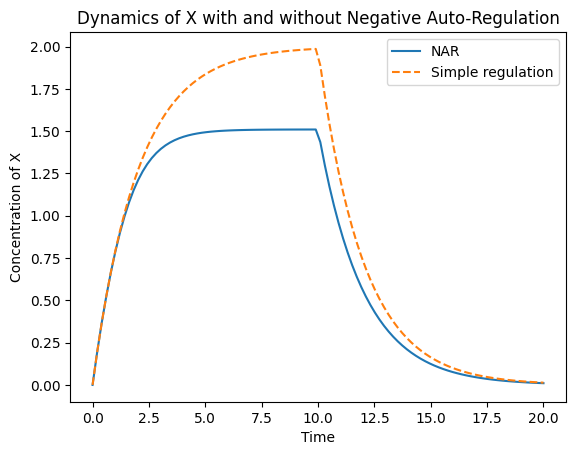

In [8]:
## Negative auto-regulation
# The negative auto-regulation is compare with the simple model of gene expression.
# Gene expression starts at t=0 (input signal) and stops at t=10.

# Define the differential equation for negative auto-regulation
# def model_auto_regulated(X, t, alpha, beta, gamma):
#     if t >= 10:  # After t=10, production stops and only decay happens
#         dXdt = -alpha * X
#     else:
#         # Negative auto-regulation: production rate decreases as X increases
#         dXdt = beta_reg - alpha * X - gamma * X**2
#     return dXdt

# Define the differential equation for negative auto-regulation
def model_auto_regulated(X, t, alpha, beta_reg, K, n):
    if t >= 10:  # After t=10, production stops and only decay happens
         dXdt = -alpha * X
    else:
        # Negative auto-regulation: production rate decreases as X increases with a decaying Hill function
        production = beta_reg / (1 + (X / K)**n)
        #production = beta_reg / (1 + (X / K))
        decay = alpha * X
        dXdt = production - decay
    return dXdt


# Define the differential equation for simple regulation
def model_simple(X, t, alpha, beta):
    if t >= 10:
        dXdt = -alpha * X
    else:
        dXdt = beta - alpha * X
    return dXdt

# Parameters
# alpha = 0.5    # Decay rate
# beta = 1       # Production rate
# beta_reg = 20       # Production rate of the auto-regulated promotor
# #gamma = 0.4    # Auto-regulation strength
# K = 2        # Hill constant
# n = 4        # Hill coefficient

# Initial condition
X_0 = 0.0

# Time points (0 to 20, with 100 points in between)
t = np.linspace(0, 20, 100)

# Integrate the ODEs
#X_auto_regulated = odeint(model_auto_regulated, X_0, t, args=(alpha, beta, gamma))
X_auto_regulated = odeint(model_auto_regulated, X_0, t, args=(alpha, beta_reg, K, n))
X_simple = odeint(model_simple, X_0, t, args=(alpha, beta))

# Plot results
plt.plot(t, X_auto_regulated, label='NAR')
plt.plot(t, X_simple, label='Simple regulation', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Concentration of X')
plt.title('Dynamics of X with and without Negative Auto-Regulation')
plt.legend()
plt.show()


### The AND FFL and Its Impact on Response Time

The AND Feedforward Loop (AND FFL) is particularly notable for its role in modulating response times in cellular processes. This motif plays a crucial role in ensuring precise and timely cellular responses to complex environmental signals.

#### The Architecture of the AND FFL

1. **Basic Structure**:
   - The AND FFL consists of three key components: a regulator gene (X), an intermediate gene (Y), and a target gene (Z).
   - Gene X regulates gene Y, and both X and Y are required to jointly regulate gene Z. This creates a two-pathway control to the expression of Z: a direct path from X to Z and an indirect path from X through Y to Z.

2. **AND Logic Gate**:
   - The term "AND" denotes that the activation of the target gene (Z) requires the simultaneous presence of the activating signals from both X and Y. Only when both X and Y are active does Z get expressed.

#### Delay in Response Time

1. **Mechanism of Delay**:
   - The key feature of the AND FFL is its ability to introduce a delay in the response of the target gene Z. This delay is inherent due to the requirement of the activation of both X and Y.
   - The indirect pathway, where X activates Y, and then Y, in turn, activates Z, takes more time compared to the direct pathway from X to Z. This leads to a delayed activation of Z until both X and Y reach their effective concentrations.

2. **Biological Significance**:
   - This delay ensures that transient fluctuations in the environment or short-lived signals do not lead to an immediate response, allowing the cell to respond only to sustained signals.
   - It contributes to noise filtering and prevents the overreaction of a cell to minor stimuli, thereby adding robustness and stability to cellular processes.



In [22]:
## Parameters of the AND FFL
K_X = 2 # Concentration of X that activates Y and Z
K_Y = 2.5 # Concentration of Y that activates Z
t_on = 5 # duration of the activation signal

## Parameters for the production/elimination of X, Y and Z
alpha_X = 0.7
beta_X = 2
alpha_Y = 0.7
beta_Y = 2
alpha_Z = 0.35
beta_Z = 2

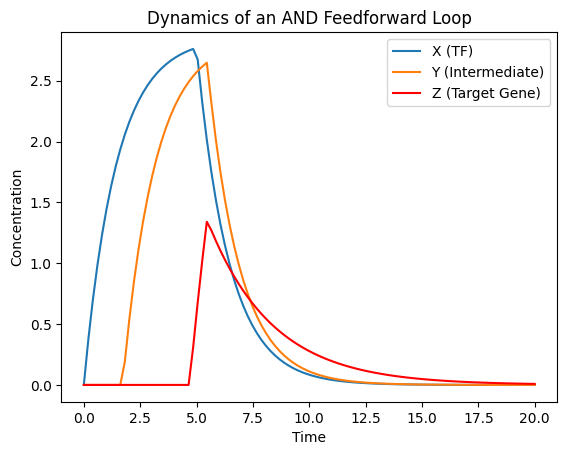

In [23]:


# Define the system of differential equations
def system(conditions, t, alpha_X, beta_X, alpha_Y, beta_Y, alpha_Z, beta_Z, K_X, K_Y):
    X, Y, Z = conditions

    # Equation for X (transcription factor)
    # X production stops at t = t_on
    if t > t_on:
        dXdt = -alpha_X * X
    else:
        dXdt = beta_X - alpha_X * X

    # Equation for Y (intermediate component)
    # Y is activated by X
    if X > K_X:
        dYdt = beta_Y - alpha_Y * Y
    else:
        dYdt = -alpha_Y * Y

    # Equation for Z (target gene)
    # Z is activated only if both X and Y are above their respective thresholds
    if X > K_X and Y > K_Y:
        dZdt = beta_Z - alpha_Z * Z
    else:
        dZdt = -alpha_Z * Z

    return [dXdt, dYdt, dZdt]

# Parameters
#alpha_X = 0.7
#beta_X = 2
#alpha_Y = 0.7
#beta_Y = 2
#alpha_Z = 0.35
#beta_Z = 2

# Initial conditions
X_0 = 0.0
Y_0 = 0.0
Z_0 = 0.0

# Time points
t = np.linspace(0, 20, 100)

# Solve the system of ODEs
conditions = odeint(system, [X_0, Y_0, Z_0], t, args=(alpha_X, beta_X, alpha_Y, beta_Y, alpha_Z, beta_Z, K_X, K_Y))

# Extract X, Y, and Z
X, Y, Z = conditions.T

# Plot results
plt.plot(t, X, label='X (TF)')
plt.plot(t, Y, label='Y (Intermediate)')
plt.plot(t, Z, label='Z (Target Gene)', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of an AND Feedforward Loop')
plt.legend()
plt.show()


We can compute the delay, based on the parameters you chose.

In [15]:
## Delay
# first we need to calculate Y_s, dy/dt = 0
Y_s = beta_Y/alpha_Y

#t_on = (1/alpha_Y)log(1/(1-(K_Y/Y_s)))
t_on = (1 / alpha_Y) * math.log(1 / (1 - (K_Y / Y_s)))
print("The delay in the response is",round(t_on,1), "steps.")

The delay in the response is 3.0 steps.


Now you know for how long the signal needs to persist, you can tweak the parameter `t_on` above to see how the FFL filters out transient signals.

### The OR FFL and Its Impact on the Delay of the OFF signal
The OR Feedforward Loop (OR FFL) confers several unique properties to biological systems, which are critical in determining how cells respond to environmental signals and regulate gene expression:

#### Speedy and Sensitive Response
- **Quick Activation**:
   - In an OR FFL, the presence of either regulator (X or Y) is sufficient to activate the target gene (Z). This allows for a quicker response compared to the AND FFL, where both regulators are needed.
   - The system can rapidly respond to changes, as it does not require the simultaneous activation of both pathways.
- **Increased Sensitivity**:
   - The OR FFL enhances the sensitivity of the target gene to signals. Even if one pathway is weak or slow, the other can compensate, ensuring that the target gene is activated in various conditions.

#### Flexibility and Robustness
- **Adaptability to Diverse Signals**:
   - The OR FFL enables the cell to integrate different types of signals, each potentially coming from different upstream pathways.
   - This adaptability is crucial in environments where cells are exposed to a variety of stimuli, requiring a flexible response mechanism.
- **Robustness Against Failures**:
   - The redundancy in the OR FFL (where either X or Y can activate Z) provides robustness against failures or fluctuations in one of the signaling pathways.
   - It ensures that the target gene can still be expressed even if one regulator is not functioning properly, which is vital for the survival of cells under stress or mutation.

### Response to Transient Signals
- **Responsiveness to Short-Term Signals**:
   - Unlike the AND FFL, which filters out transient signals, the OR FFL can allow for responses to short-term changes in the environment.
   - This property is beneficial in situations where rapid responses to temporary signals are necessary.

The property we will observe in our simulation is the persistence of the output of the circuit after the activation signal has gone out.

#### Parameters of the OR FFL in the OFF signal regime
We want to explore the persistance of Z after the activation signal is OFF. We set $t_{on} = 0$, $X_0 = X_s$, $Y_0 = Y_s$ and $Z_0 = Z_s$

Observe for how long Z persists depending on, which parameters?

In [30]:
## Parameters of the OR FFL
K_X = 1 # Concentration of X that activates Y and Z
K_Y = 0.5 # Concentration of Y that activates Z
t_on = 0 # duration of the activation signal. We simulate now the time range when the activation signal stops. X, Y and Z are at their steady state levels
# The steady state levels of each gene depends on its alpha and its beta
alpha_X = 0.7
beta_X = 2
alpha_Y = 0.5
beta_Y = 8
Z_s = beta_Z/alpha_Z
X_s = beta_X/alpha_X
Y_s = beta_Y/alpha_Y
print("X_s = ",round(X_s,1))
print("Y_s = ", round( Y_s,1))
print("Z_s = ", round( Z_s,1))

X_s =  2.9
Y_s =  16.0
Z_s =  5.7


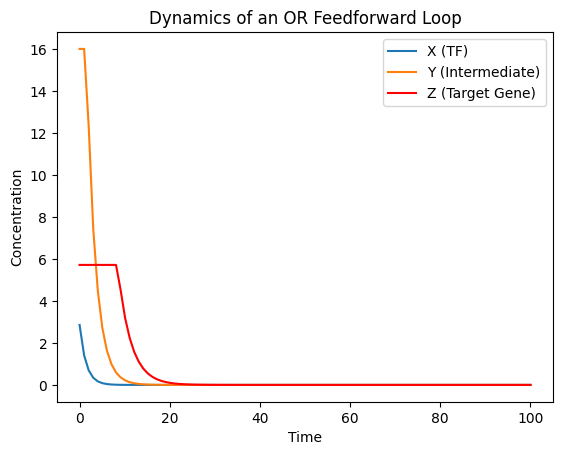

In [31]:

# Define the system of differential equations
def system(conditions, t, alpha_X, beta_X, alpha_Y, beta_Y, alpha_Z, beta_Z, K_X, K_Y):
    X, Y, Z = conditions

    # Equation for X (transcription factor)
    # X production stops at t = t_on
    if t > t_on:
        dXdt = -alpha_X * X
    else:
        dXdt = beta_X - alpha_X * X

    # Equation for Y (intermediate component)
    if X > K_X:
        dYdt = beta_Y - alpha_Y * Y
    else:
        dYdt = -alpha_Y * Y

    # Equation for Z (target gene)
    # Z is activated only if both X and Y are above their respective thresholds
    if X > K_X or Y > K_Y:
        dZdt = beta_Z - alpha_Z * Z
    else:
        dZdt = -alpha_Z * Z

    return [dXdt, dYdt, dZdt]

# Parameters

alpha_Z = 0.35
beta_Z = 2

# Initial conditions
X_0 = X_s
Y_0 = Y_s
Z_0 = Z_s

# Time points
t = np.linspace(0, 100, 100)

# Solve the system of ODEs
conditions = odeint(system, [X_0, Y_0, Z_0], t, args=(alpha_X, beta_X, alpha_Y, beta_Y, alpha_Z, beta_Z, K_X, K_Y))

# Extract X, Y, and Z
X, Y, Z = conditions.T


# Compute the delay t_off
t_off = (1 / alpha_Y) * math.log(Y_s / K_Y )

# Find the steady-state value of Z (Z_s)
# Z_s = Z[-1]  # Assuming the last value is the steady-state value
# print(Z_s)
# print(X[-1])
# print(Y[-1])
# # Calculate Z/Z_s for each time point
# Z_normalized = Z / Z_s

# Plot Z/Z_s vs t
# Focusing on the region where the activation signal is OFF (t > t_on)
# plt.figure(figsize=(10, 5))
# plt.plot(t, Z_normalized, label='Z/Z_s', color='blue')
# plt.axvline(x=t_on, color='grey', linestyle='--', label='Activation Signal OFF')
# plt.xlabel('Time')
# plt.ylabel('Z/Z_s')
# plt.title('Normalized Z Concentration Over Time')
# plt.legend()
# plt.show()


# Plot results
plt.plot(t, X, label='X (TF)')
plt.plot(t, Y, label='Y (Intermediate)')
plt.plot(t, Z, label='Z (Target Gene)', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of an OR Feedforward Loop')
plt.legend()
plt.show()

In [32]:
print("The delay in the response to the off signal is:",round(t_off,1))

The delay in the response to the off signal is: 6.9


### The I1 FFL response depends on how Y represses Z
The Incoherent Type 1 Feedforward Loop (I1-FFL) is a fascinating and functionally significant circuit. A transcription factor exerts both direct and indirect, conflicting influences on a target gene. Specifically, in an I1-FFL, the transcription factor activates the target gene and also activates an intermediate gene, which then inhibits the target gene.

#### Key Components and Dynamics
- **Components**:
   - **Transcription Factor (X)**: Initiates the regulatory process.
   - **Intermediate Gene (Y)**: Activated by X, acts as an inhibitor.
   - **Target Gene (Z)**: Directly activated by X and inhibited by Y.

- **Incoherent Regulation**:
   - The term 'incoherent' signifies the opposing actions of the transcription factor (X) on the target gene (Z) —direct activation and indirect inhibition via Y.

#### Pulse Output Signal in I1-FFL
- **Pulsed Response Generation**:
   - The I1-FFL is especially known for its ability to generate a transient or pulse-like output. This behavior depends on the strength of repression of Z by Y.
- **Mechanism**:
   - Initially, X activates both Y and Z. However, as Y accumulates and crosses a certain threshold, it begins to strongly inhibit Z.
   - The result is a rapid increase in Z's expression followed by a sharp decline, creating a pulse-like or transient peak in Z's concentration.
- **Biological Significance**:
   - This pulsatile response is crucial in biological contexts where a brief, strong expression of a gene is required, followed by quick repression.
   - It enables cells to respond dynamically to fluctuating environments, providing a mechanism for adaptation without maintaining a prolonged response.

For this example we have set two modes of repression of Z by Y, so you can observe that the shape of the output of the circuit depends on the strength of the repression.

##### I1-FFL with a weak repression

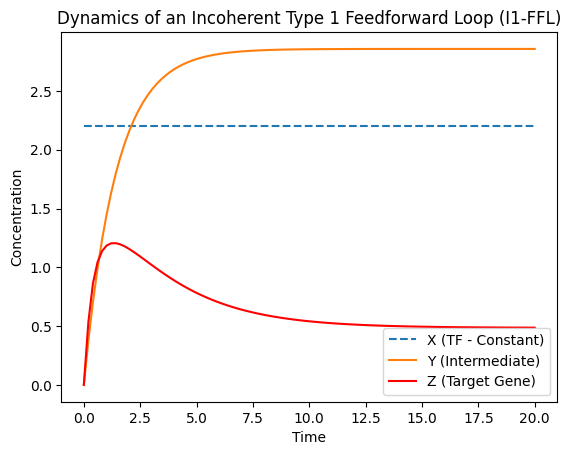

In [37]:

# Parameters
K_X = 2    # Concentration of X that activates Y and inhibits Z
K_Y = 0.7  # Concentration of Y that inhibits Z
alpha_Y = 0.7
beta_Y = 2
alpha_Z = 0.35
beta_Z = 3
n = 2
# Assume constant high levels of X
X_value = K_X + 0.2  # X is always above K_X

# Define the system of differential equations
def system(conditions, t, alpha_Y, beta_Y, alpha_Z, beta_Z, K_Y, X,n):
    Y, Z = conditions

    # Equation for Y (intermediate component)
    dYdt = beta_Y - alpha_Y * Y

    # Equation for Z (target gene)
    # Z is activated by X and inhibited by Y
    #dZdt = beta_Z - alpha_Z * Z - (beta_Z * Y / (K_Y + Y))  # Inhibitory effect of Y
    dZdt = beta_Z - alpha_Z * Z - (beta_Z * Y**n / (K_Y**n + Y**n)) #sharper inhibitory effect

    return [dYdt, dZdt]

# Initial conditions
Y_0 = 0.0
Z_0 = 0.0

# Time points
t = np.linspace(0, 20, 100)

# Solve the system of ODEs
conditions = odeint(system, [Y_0, Z_0], t, args=(alpha_Y, beta_Y, alpha_Z, beta_Z, K_Y, X, n))

# Extract Y and Z
Y, Z = conditions.T

# Create a constant array for X
X = np.full_like(t, X_value)

# Plot results
plt.plot(t, X, label='X (TF - Constant)', linestyle='--')
plt.plot(t, Y, label='Y (Intermediate)')
plt.plot(t, Z, label='Z (Target Gene)', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of an Incoherent Type 1 Feedforward Loop (I1-FFL)')
plt.legend()
plt.show()


##### I1-FFL with a strong repression

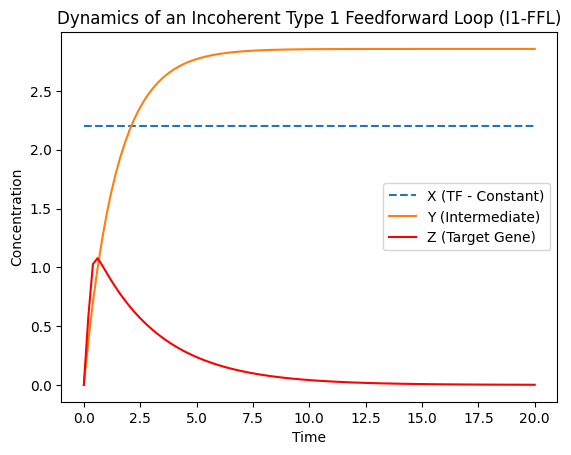

In [34]:

# Parameters
K_X = 2    # Concentration of X that activates Y and inhibits Z
K_Y = 0.7  # Concentration of Y that inhibits Z
alpha_Y = 0.7
beta_Y = 2
alpha_Z = 0.35
beta_Z = 3
n = 8
# Assume constant high levels of X
X_value = K_X + 0.2  # X is always above K_X

# Define the system of differential equations
def system(conditions, t, alpha_Y, beta_Y, alpha_Z, beta_Z, K_Y, X,n):
    Y, Z = conditions

    # Equation for Y (intermediate component)
    dYdt = beta_Y - alpha_Y * Y

    # Equation for Z (target gene)
    # Z is activated by X and inhibited by Y
    # dZdt = beta_Z - alpha_Z * Z - (beta_Z * Y / (K_Y + Y))  # Inhibitory effect of Y
    dZdt = beta_Z - alpha_Z * Z - (beta_Z * Y**n / (K_Y**n + Y**n)) #sharper inhibitory effect

    return [dYdt, dZdt]

# Initial conditions
Y_0 = 0.0
Z_0 = 0.0

# Time points
t = np.linspace(0, 20, 100)

# Solve the system of ODEs
conditions = odeint(system, [Y_0, Z_0], t, args=(alpha_Y, beta_Y, alpha_Z, beta_Z, K_Y, X, n))

# Extract Y and Z
Y, Z = conditions.T

# Create a constant array for X
X = np.full_like(t, X_value)

# Plot results
plt.plot(t, X, label='X (TF - Constant)', linestyle='--')
plt.plot(t, Y, label='Y (Intermediate)')
plt.plot(t, Z, label='Z (Target Gene)', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of an Incoherent Type 1 Feedforward Loop (I1-FFL)')
plt.legend()
plt.show()


### The I1-FFL can speed response times
The response time is defined as the time it takes for the gene to reach half of its steady-state level. In this simulation we compare the I1-FFL with the simple regulation, so we can examine how the I1-FFL is similar to the negative auto-regulation in speeding up the response time.

Response time for Z (I1-FFL): 0.3
Response time for Z2 (Simple Regulation): 0.9


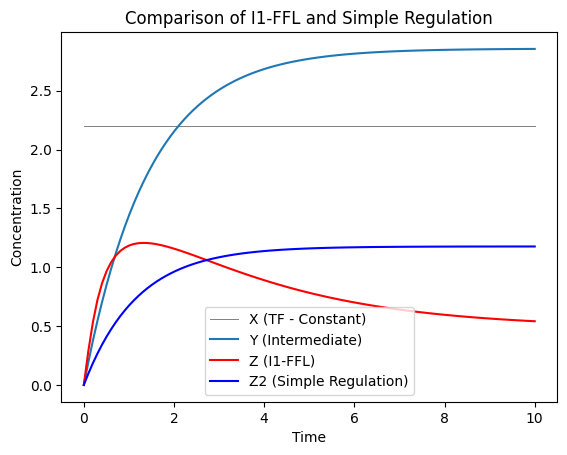

In [38]:
# Parameters
K_X = 2    # Concentration of X that activates Y and inhibits Z
K_Y = 0.7  # Concentration of Y that inhibits Z
alpha_Y = 0.7
beta_Y = 2
alpha_Z = 0.35
beta_Z = 3
n = 2
# Parameters for Z2
alpha_Z2 = 0.85
beta_Z2 = 1

t_off = 10

# Assume constant high levels of X and X goes to 0 after a time t_off
X_value = K_X + 0.2  # X is always above K_X


# Function to find the response time (time to reach half of the steady-state level)
def find_response_time(signal, t):
    #steady_state = signal[-1]
    # consider the same steady state, Z2
    steady_state = beta_Z2/alpha_Z2
    half_steady_state = steady_state / 2
    for i, value in enumerate(signal):
        if value >= half_steady_state:
            return t[i]
    return None

# Define the extended system of differential equations
def extended_system(conditions, t, alpha_Y, beta_Y, alpha_Z, beta_Z, K_Y, X, n, alpha_Z2, beta_Z2):
    Y, Z, Z2 = conditions

    # Equation for X (transcription factor)
    # X production stops at t = t_on
    if t < t_off:
        dXdt = -alpha_X * X
    else:
        dXdt = beta_X - alpha_X * X

    # Equations for Y and Z as before
    dYdt = beta_Y - alpha_Y * Y
    dZdt = beta_Z - alpha_Z * Z - (beta_Z * Y**n / (K_Y**n + Y**n))

    # Equation for Z2 (simple regulation by X)
    dZ2dt = beta_Z2 - alpha_Z2 * Z2

    return [dYdt, dZdt, dZ2dt]


# Initial conditions
Y_0 = 0.0
Z_0 = 0.0
Z2_0 = 0.0


# Time points
t = np.linspace(0, 10, 100)
# Solve the extended system of ODEs
extended_conditions = odeint(extended_system, [Y_0, Z_0, Z2_0], t, args=(alpha_Y, beta_Y, alpha_Z, beta_Z, K_Y, X, n, alpha_Z2, beta_Z2))

# Extract Y, Z, and Z2
Y, Z, Z2 = extended_conditions.T

# Calculate and print response times
response_time_Z = find_response_time(Z, t)
response_time_Z2 = find_response_time(Z2, t)
print(f"Response time for Z (I1-FFL): {round(response_time_Z,1)}")
print(f"Response time for Z2 (Simple Regulation): {round(response_time_Z2,1)}")

# Plot results
plt.plot(t, X, label='X (TF - Constant)'
         #, linestyle='--'
         , linewidth=0.7
         , color='grey')
plt.plot(t, Y, label='Y (Intermediate)')
plt.plot(t, Z, label='Z (I1-FFL)', color='red')
plt.plot(t, Z2, label='Z2 (Simple Regulation)', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Comparison of I1-FFL and Simple Regulation')
plt.legend()
plt.show()


Response time for Z (I1-FFL): 0.7
Response time for Z2 (Simple Regulation): 2.0


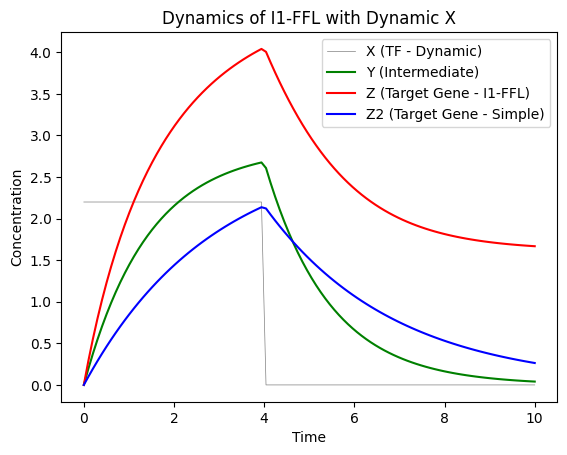

In [39]:
# Parameters
K_X = 2    # Concentration of X that activates Y and inhibits Z
K_Y = 0.7  # Concentration of Y that inhibits Z
alpha_Y = 0.7
beta_Y = 2
alpha_Z = 0.35
beta_Z = 3
n = 1
# Parameters for Z2
alpha_Z2 = 0.35
beta_Z2 = 1

s = 4

X_value = K_X + 0.2
## Calculate the steady states for Z and Z2
Z_s = beta_Z/alpha_Z
Z2_s = beta_Z2/alpha_Z2

# Function to find the response time (time to reach half of the steady-state level)
def find_response_time(signal, t):
    #steady_state = signal[-1]
    # consider the same steady state, Z2
    steady_state = beta_Z2/alpha_Z2
    half_steady_state = steady_state / 2
    for i, value in enumerate(signal):
        if value >= half_steady_state:
            return t[i]
    return None
# Function to dynamically define X based on time
def X_dynamic(t, X_value, t_switch):
    return X_value if t <= t_switch else 0

# Define the system of differential equations with dynamic X
def system(conditions, t, alpha_Y, beta_Y, alpha_Z, beta_Z, K_Y, X_value, t_switch, n, alpha_Z2, beta_Z2):
    Y, Z, Z2 = conditions
    X = X_dynamic(t, X_value, t_switch)  # X depends on time

    # Equation for Y (intermediate component)
    # Y is activated by X
    if X > K_X:
        dYdt = beta_Y - alpha_Y * Y
    else:
        dYdt = -alpha_Y * Y
    #dYdt = beta_Y - alpha_Y * Y

    # Z is activated by X and repressed by Y
    if X > K_X:
        #dZdt = beta_Z - alpha_Z * Z - (beta_Z * Y**n / (K_Y**n + Y**n))
        dZdt = beta_Z - alpha_Z * Z - (beta_Z * (Y**n / K_Y**n) / (1 + (Y**n / K_Y**n) + s))
    else:
        #dZdt =  - alpha_Z * Z
        dZdt =  - (beta_Z * (Y**n / K_Y**n) / (1 + (Y**n / K_Y**n) + s))




    # Equation for Z2 (simple regulation)
    # Z2 is activated by X
    if X > K_X:
        dZ2dt = beta_Z2 - alpha_Z2 * Z2
    else:
        dZ2dt = - alpha_Z2 * Z2
    #dZ2dt = beta_Z2 - alpha_Z2 * Z2


    return [dYdt, dZdt, dZ2dt]

# Parameters and initial conditions
# (Make sure to define all the parameters and initial conditions here)

# Time at which X switches off
t_switch = 4




# Initial conditions
Y_0 = 0.0
Z_0 = 0.0
Z2_0 = 0.0
# Time points
t = np.linspace(0, 10, 100)

# Solve the system of ODEs
initial_conditions = [Y_0, Z_0, Z2_0]
solution = odeint(system, initial_conditions, t, args=(alpha_Y, beta_Y, alpha_Z, beta_Z, K_Y, X_value, t_switch, n, alpha_Z2, beta_Z2))

# Extract Y, Z, and Z2
Y, Z, Z2 = solution.T


# Calculate and print response times
response_time_Z = find_response_time(Z, t)
response_time_Z2 = find_response_time(Z2, t)

print(f"Response time for Z (I1-FFL): {round(response_time_Z,1)}")
print(f"Response time for Z2 (Simple Regulation): {round(response_time_Z2,1)}")

# Create a dynamic array for X based on time
X_dynamic_array = [X_dynamic(time, X_value, t_switch) for time in t]

# Plot results
plt.plot(t
         , X_dynamic_array
         , label='X (TF - Dynamic)'
         #, linestyle='--'
         , linewidth=0.5
         , color='grey')
plt.plot(t, Y, label='Y (Intermediate)', color='green')
plt.plot(t, Z, label='Z (Target Gene - I1-FFL)', color='red')
plt.plot(t, Z2, label='Z2 (Target Gene - Simple)', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of I1-FFL with Dynamic X')
plt.legend()
plt.show()

